# .....................................................Data Dictionary...........................................................

### 1. age: age in years
### 2. sex: sex
###### 1 = male
###### 0 = female
### 3. cp: chest pain type
###### 0: typical angina
###### 1: atypical angina
###### 2: non-anginal pain
###### 3: asymptomatic
### 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
### 5. chol: serum cholestoral in mg/dl
### 6. fbs: (fasting blood sugar > 120 mg/dl)
###### 1 = true;
###### 0 = false
#### 7. restecg: resting electrocardiographic results
###### 0: normal
###### 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
###### 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
### 8. thalach: maximum heart rate achieved
### 9. exang: exercise induced angina
###### 1 = yes
###### 0 = no
### 10. oldpeak = ST depression induced by exercise relative to rest
### 11. slope: the slope of the peak exercise ST segment
###### 0: upsloping
###### 1: flat
###### 2: downsloping
### 12. ca: number of major vessels (0-3) colored by flourosopy
### 13. thal:
###### 0 = error (in the original dataset 0 maps to NaN's)
###### 1 = fixed defect
###### 2 = normal
###### 3 = reversable defect
### 14. target (the lable):
###### 0 = no disease,
###### 1 = disease

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
cat_feat = []
for column in data.columns:
  if len(data[column].unique()) <= 5:
    cat_feat.append(column)
print(cat_feat)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


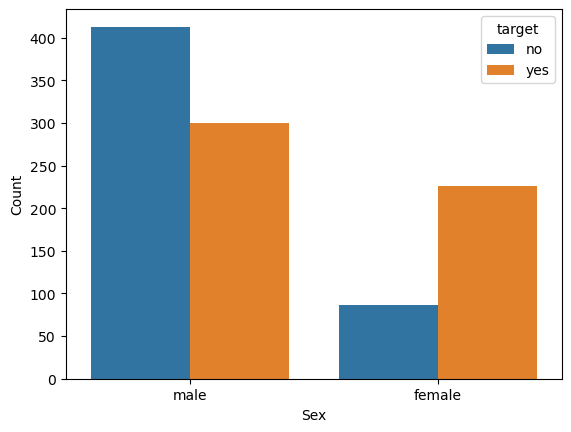

In [49]:
data2 = data.copy()
data2["sex"] = data["sex"].map({1 : "male", 0 : "female"})
data2["target"] = data["target"].map({1 : "yes", 0 : "no"})
sns.countplot(data = data2, x = "sex", hue = "target")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


#### -More patients in the sample data are male.
#### -Females have higher rate of heart problem

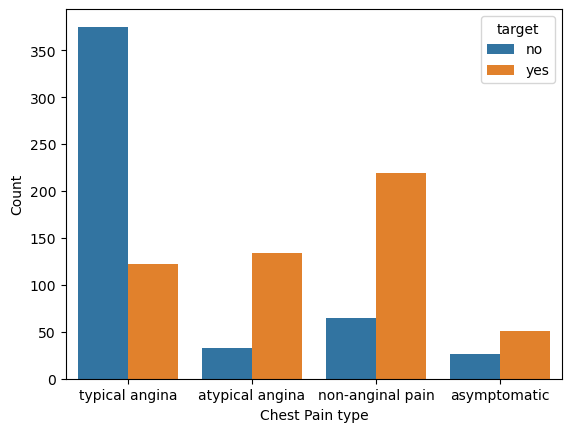

In [50]:
data2["cp"] = data2["cp"].map({0 : 'typical angina', 1 : 'atypical angina', 2 : "non-anginal pain", 3 : "asymptomatic"})
sns.countplot(data = data2, x = "cp", hue = "target")
plt.xlabel("Chest Pain type")
plt.ylabel("Count")
plt.show()

#### -Most of the patients are suffering from either typical or non-anginal pain whith more having typical angina pain
#### -Patients suffering from either atypical or non-angina pain are likely to have heart problem

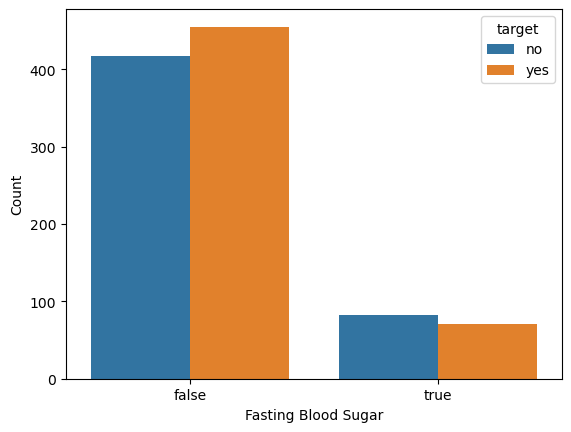

In [51]:
data2['fbs'] = data2["fbs"].map({0 : "false", 1 : "true"})
sns.countplot(data = data2, x = "fbs", hue = "target")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")
plt.show()

##### -Patients with lower fasting blood sugar have higher population
##### -Patients having lower fasting blood sugar have higher tendency to suffer from heart condition

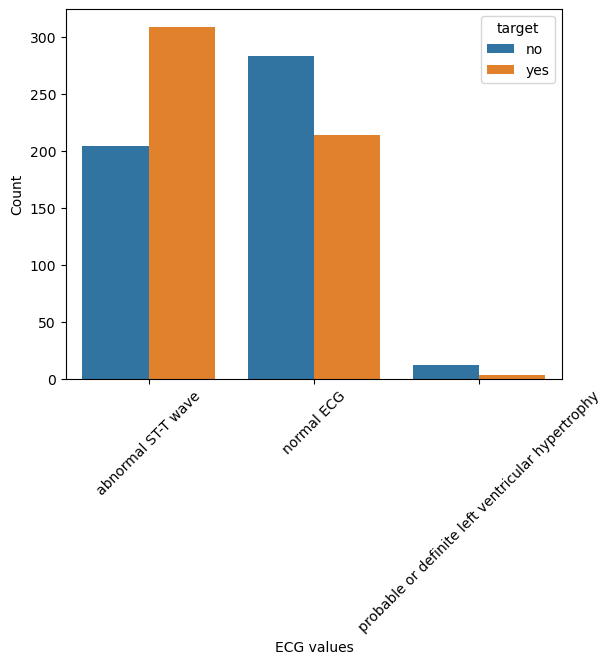

In [52]:
data2['restecg'] = data2["restecg"].map({0 : "normal ECG", 1 : "abnormal ST-T wave", 2 : "probable or definite left ventricular hypertrophy"})
sns.countplot(data = data2, x = "restecg", hue = "target")
plt.xlabel("ECG values")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

##### -Patients with left ventricular hypertrophy are the fewest with others having almost equal distribution
##### -Patients having abnormal ST-T  have the highest tendency of suffering from heart disease

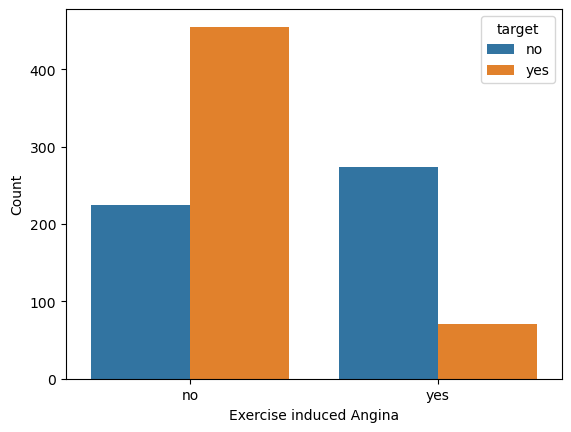

In [53]:
data2['exang'] = data2["exang"].map({0 : "no", 1 : "yes"})
sns.countplot(data = data2, x = "exang", hue = "target")
plt.xlabel("Exercise induced Angina")
plt.ylabel("Count")
plt.show()

##### -Most patients(65%) show no exercise induced angina
##### -Patients with no exercise induced angina had higer rate of suffering from heart condition

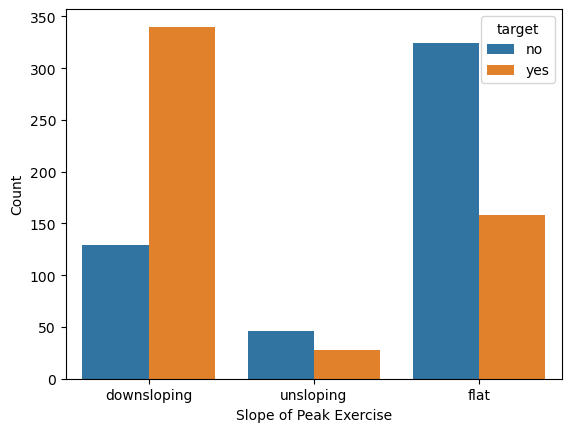

In [54]:
data2['slope'] = data2["slope"].map({0 : "unsloping", 1 : "flat", 2 : "downsloping"})
sns.countplot(data = data2, x = "slope", hue = "target")
plt.xlabel("Slope of Peak Exercise")
plt.ylabel("Count")
plt.show()

##### -Most patients have either downsloping or flat Slope of peak exercise

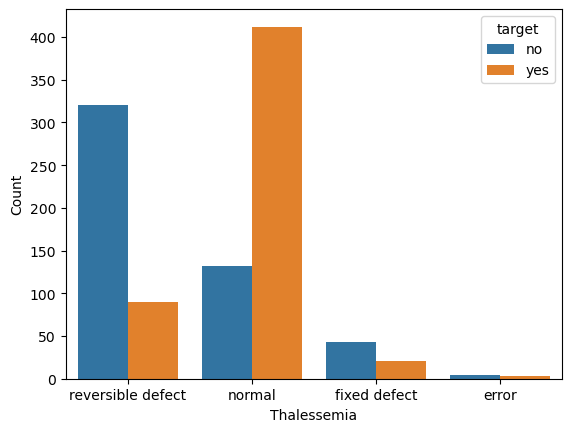

In [55]:
data2['thal'] = data2["thal"].map({0 : "error", 1 : "fixed defect", 2 : "normal", 3 : "reversible defect"})
sns.countplot(data = data2, x = "thal", hue = "target")
plt.xlabel("Thalessemia")
plt.ylabel("Count")
plt.show()

##### -Most patients have Thalassemia(reversible or fixed defect)
##### -Patients having thalassemia have lower chance of having heart problem (This is surprising)

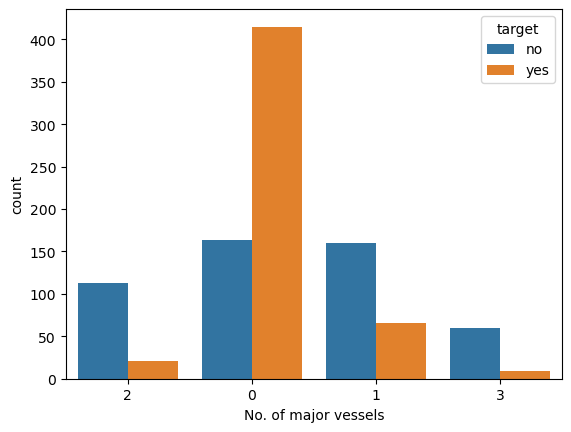

In [56]:
data2['ca'] = data2["ca"].map({0 : "0", 1 : "1", 2 : "2", 3 : "3"})
sns.countplot(data = data2, x = "ca", hue = "target")
plt.xlabel("No. of major vessels")
plt.ylabel("count")
plt.show()

##### -Patients having zero blood vessels have the highest population and also have high disease rate

In [59]:
cont_feat = []
for column in data.columns:
    if column not in cat_feat:
        cont_feat.append(column)
print(cont_feat)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


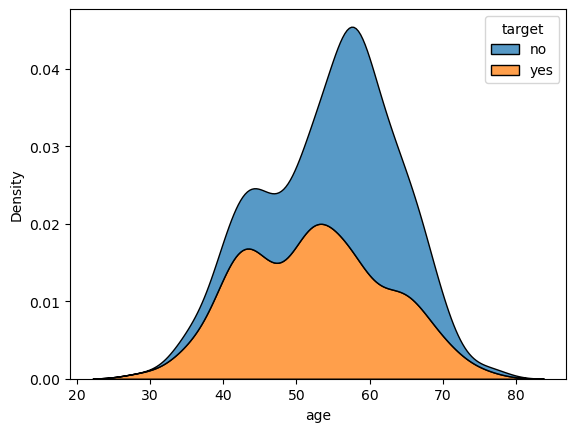

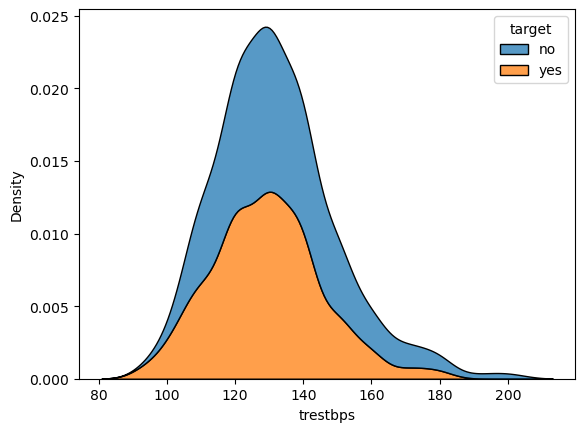

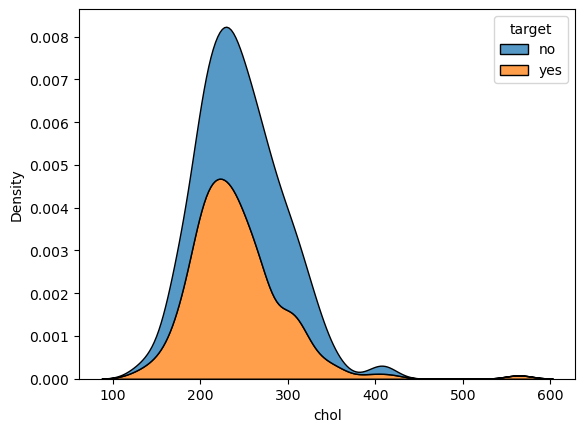

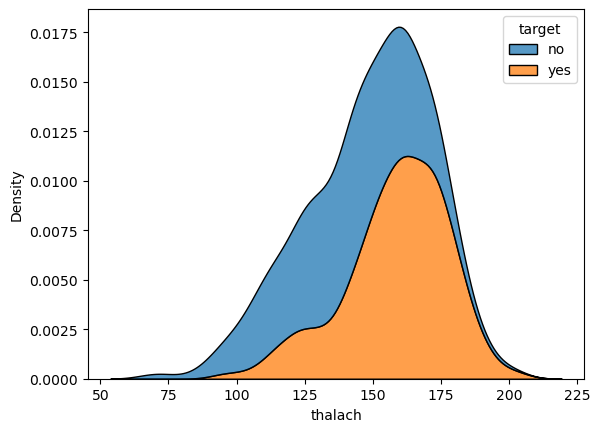

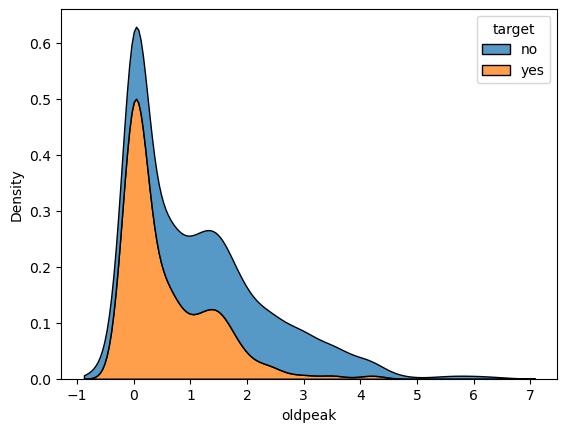

In [61]:
for feat in cont_feat:
  sns.kdeplot(data = data2, x = feat, hue = "target", multiple = "stack")
  plt.xlabel(feat)
  plt.ylabel("Density")
  plt.show()

## Age, Trestbps, and Chol are the most normally distributed while  thalach and oldpeak are left skewed and right skewed respectively

In [62]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

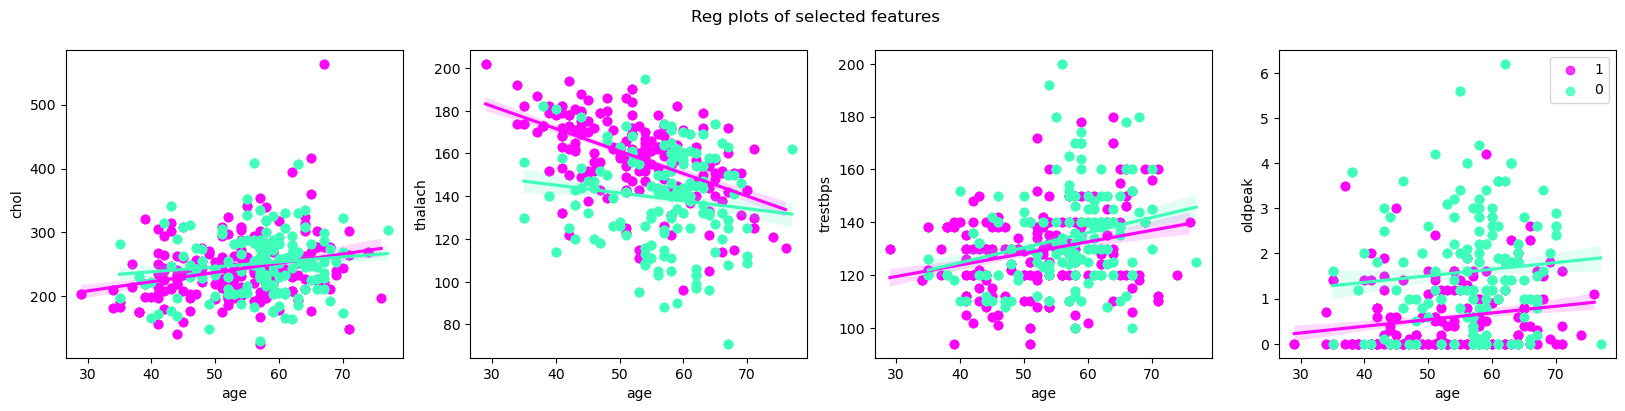

In [66]:
mypal = ["#FC05FB", "#FEAEFE", "#FCD2FC", "#F3FEFA", "#B4FFE4", "#3FFEBA"]
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='chol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='chol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='thalach', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='thalach', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='trestbps', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='trestbps', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='oldpeak', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='oldpeak', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

##### Except maximum_heart_rate_achieved, the others are positively and linearly related with age(oldpeak(st_depression) is kind of weak)
##### Younger patients with higher thalach(max_heart_rate_achieved) are more likely to have a heart condition

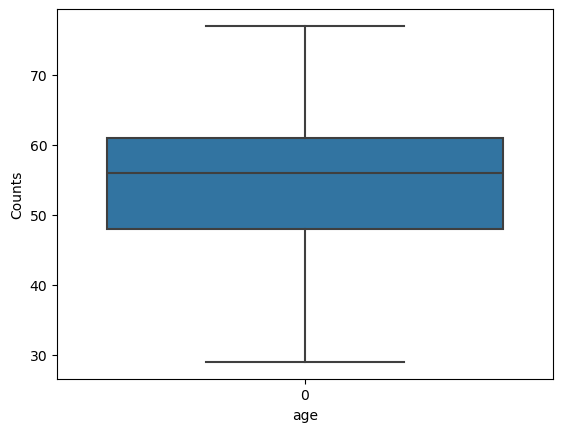

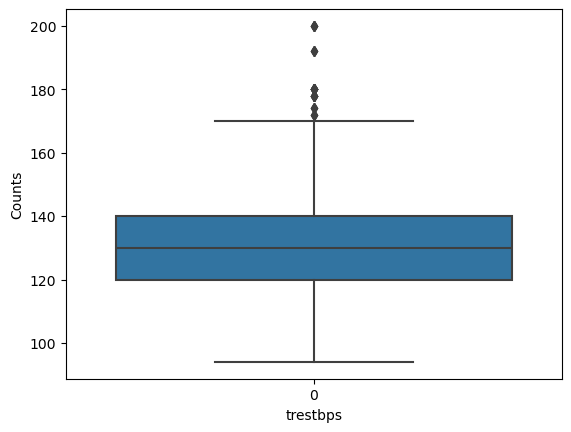

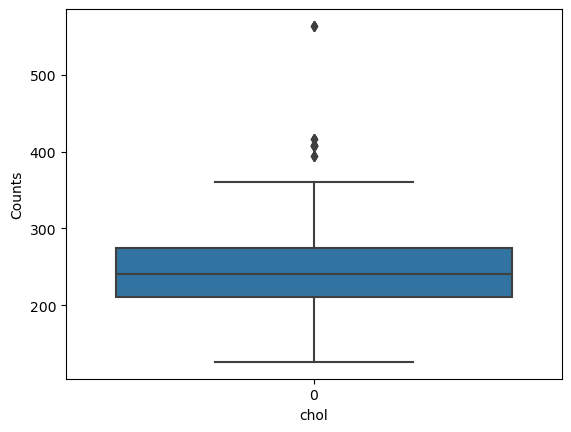

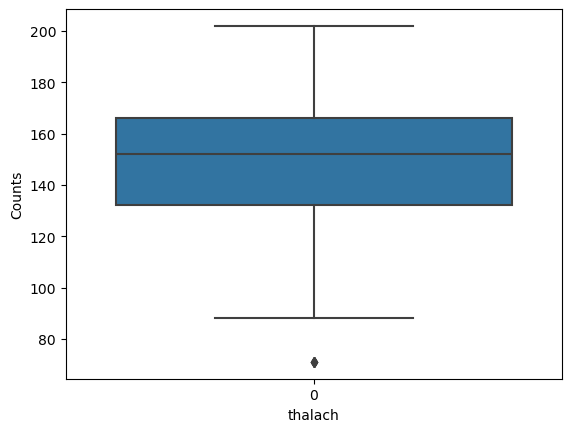

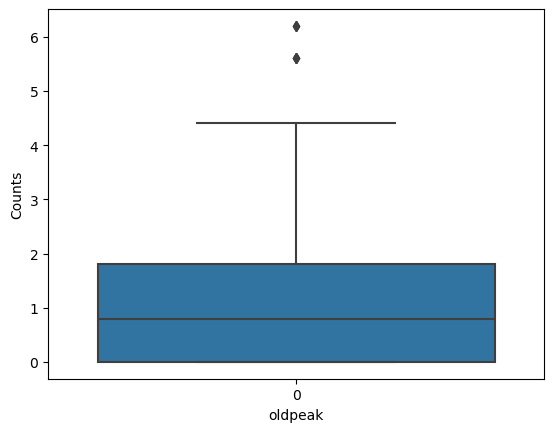

In [57]:
for feat in cont_feat:
  data2 = data.copy()
  sns.boxplot(data2[feat])
  plt.xlabel(feat)
  plt.ylabel("Counts")
  plt.show()

## -All except Age has no count of outliers.

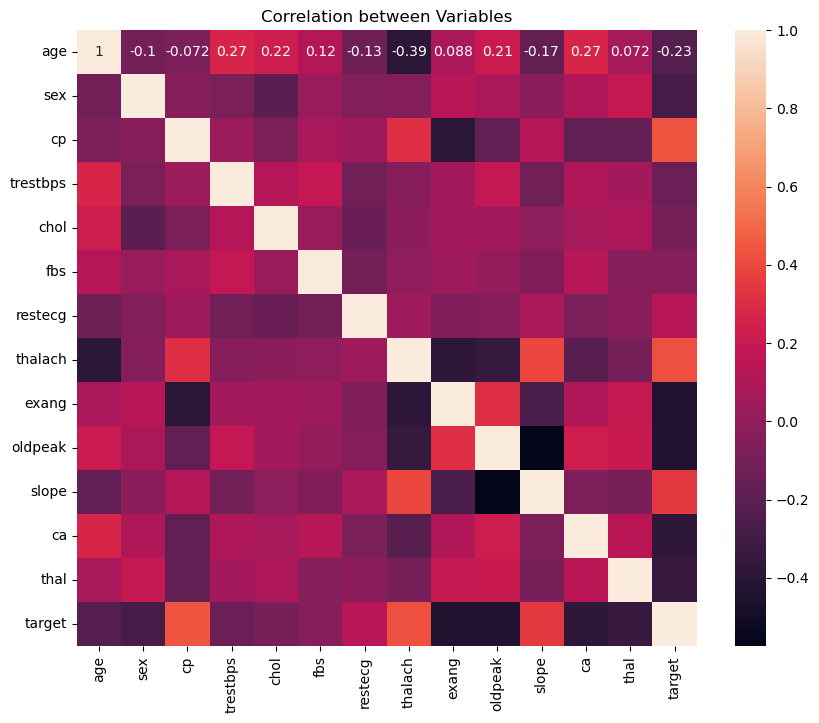

In [67]:
plt.figure(figsize = (10, 8))
sns.heatmap(data[data.columns].corr(), annot = True)
plt.title("Correlation between Variables")
plt.show()

## This heatmap shows that there is no colinearity between the independent variables

In [70]:
ind_var = []
for column in data.columns:
    if column == "target":
        pass
    else:
        ind_var.append(column)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[ind_var] = scaler.fit_transform(data[ind_var])
X = data.drop(columns = ["target"], axis =1)
y = data["target"]

In [73]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [75]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
model_params = {
    "svm" : {
        "model" : svm.SVC(),
        "params" : {
            "gamma" : ["auto", "scale"],
            "C" : [5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
            "kernel" : ["rbf", "linear"]            
        }
    },

    "rfc" : {
    "model" : RandomForestClassifier(),
    "params" : {
        "n_estimators" : [5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        "criterion" : ["gini", "entropy"]
    }
    },

    "logreg" : {
        "model" : LogisticRegression(),
        "params" : {
            "C" : [1, 3, 5, 7, 9, 10]
        }
    },

    "knc": {
        "model" : KNeighborsClassifier(),
        "params" : {
            "n_neighbors" : [5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20],
            "leaf_size" : [5, 7, 9, 10, 11, 13, 15, 20, 30],
            "p" : [2, 3, 4, 5]
        
        }
    },

    "dtc" : {
        "model" : DecisionTreeClassifier(),
        "params" : {
            "criterion" : ["gini", "entropy"],
            "max_depth" : [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
            
        }
    },

    "xgb" : {
        "model" : xgboost.XGBClassifier(),
        "params" : {
            "n_estimators" : [5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
            "learning_rate" : [0.05, 0.1, 0.2, 0.3, 0.4]
        
        }
    }
    
}

In [111]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [114]:
score = []

for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(estimator = mp["model"], param_distributions = mp["params"], cv = 5)
    clf.fit(train_X, train_y)
    score.append({
        "model" : model_name,
        "best_score" : clf.best_score_,
        "best_params" : clf.best_params_
    })


In [119]:
df = pd.DataFrame(score, columns = ["model", "best_score", "best_params"])
df

,model,best_score,best_params
0,svm,0.952632,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 20}"
1,rfc,0.977700,"{'n_estimators': 19, 'criterion': 'gini'}"
2,logreg,0.842453,{'C': 1}
3,knc,0.853613,"{'p': 2, 'n_neighbors': 7, 'leaf_size': 5}"
4,dtc,0.974903,"{'max_depth': 15, 'criterion': 'entropy'}"
5,xgb,0.969357,"{'n_estimators': 19, 'learning_rate': 0.4}"


In [120]:
score_g = []

for model_name, mp in model_params.items():
    clf_g = GridSearchCV(estimator = mp["model"], param_grid = mp["params"], cv = 5)
    clf_g.fit(train_X, train_y)
    score_g.append({
        "model" : model_name,
        "best_score" : clf_g.best_score_,
        "best_params" : clf_g.best_params_
    })


In [121]:
dfs = pd.DataFrame(score_g, columns = ["model", "best_score", "best_params"])
dfs

,model,best_score,best_params
0,svm,0.955410,"{'C': 19, 'gamma': 'scale', 'kernel': 'rbf'}"
1,rfc,0.980507,"{'criterion': 'gini', 'n_estimators': 20}"
2,logreg,0.842453,{'C': 1}
3,knc,0.859149,"{'leaf_size': 5, 'n_neighbors': 9, 'p': 2}"
4,dtc,0.974903,"{'criterion': 'entropy', 'max_depth': 15}"
5,xgb,0.972145,"{'learning_rate': 0.4, 'n_estimators': 18}"


In [123]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
error_train = []
error_val = []
for i in range(1, 20):
    model = RandomForestClassifier(criterion = "gini", n_estimators = i ,max_depth = 9)
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    error = 1 - model.score(train_X, train_y)
    error_ = 1 - accuracy_score(val_y, pred_y)
    error_train.append(error)
    error_val.append(error_)

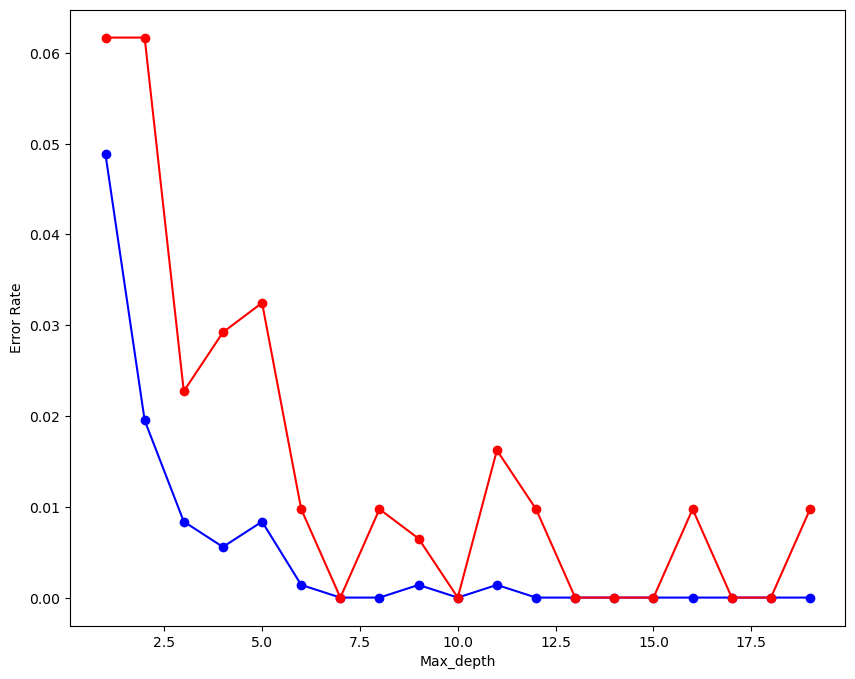

In [124]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 20), error_train, color = "blue", marker = "o")
plt.plot(range(1, 20), error_val, color = "red", marker = "o")
plt.xlabel("Max_depth")
plt.ylabel("Error Rate")
plt.show()

In [126]:
rfc = RandomForestClassifier(n_estimators = 20, criterion="gini", max_depth = 9)
rfc.fit(train_X, train_y)

RandomForestClassifier(max_depth=9, n_estimators=20)

In [134]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report
rfc_predict = rfc.predict(val_X)
print(accuracy_score(val_y, rfc_predict), roc_auc_score(val_y, rfc_predict), f1_score(val_y, rfc_predict))
print(confusion_matrix(val_y, rfc_predict))


1.0 1.0 1.0
[[150   0]
 [  0 158]]


In [136]:
print(classification_report(val_y, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       158

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

